In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
train_df = pd.read_csv('train_dt.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df.sample(2).T

,514,65
Loan_ID,LP002652,LP001225
Gender,Male,Male
Married,No,Yes
Dependents,0,0
Education,Graduate,Graduate
Self_Employed,No,No
ApplicantIncome,5815,5726
CoapplicantIncome,3666.0,4595.0
LoanAmount,311.0,258.0
Loan_Amount_Term,360.0,360.0


## Missing data

In [5]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df.isna().sum()/len(train_df)* 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Drop the missing data for the training activity

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Let us understand the relationship between Y and Xis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


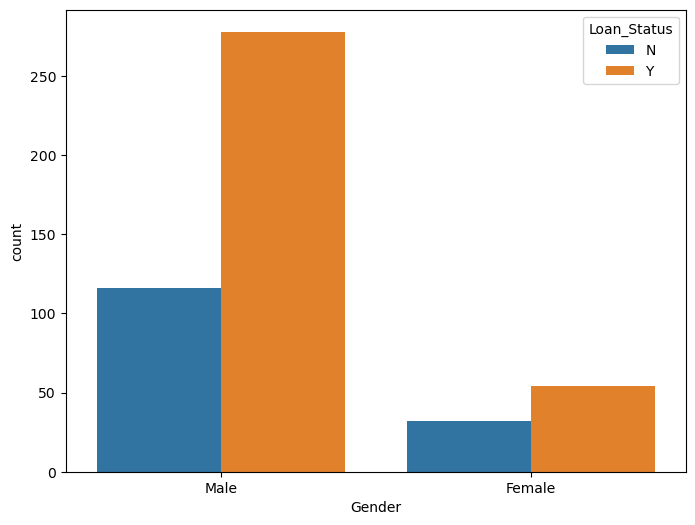

In [10]:
plt.subplots(figsize=(8, 6))
sns.countplot(x=train_df['Gender'], hue=train_df['Loan_Status'])
plt.show()

In [11]:
train_df.groupby('Gender').agg(Count_Application = ('Loan_ID', 'nunique')).reset_index()

,Gender,Count_Application
0,Female,86
1,Male,394


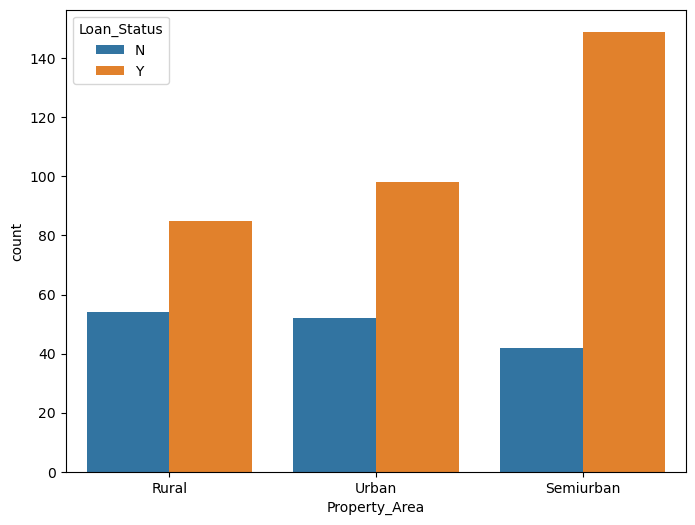

In [12]:
plt.subplots(figsize=(8, 6))
sns.countplot(x=train_df['Property_Area'], hue=train_df['Loan_Status'])
plt.show()

- More applications are from Semi urban area and also like they approval rate is higher


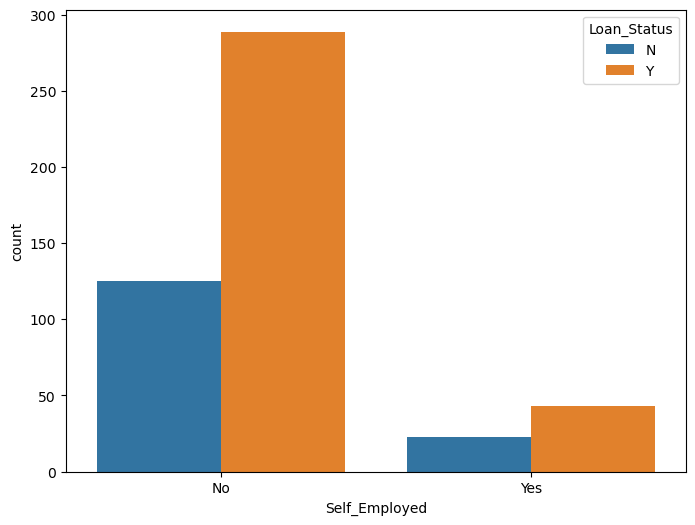

In [13]:
plt.subplots(figsize=(8, 6))
sns.countplot(x=train_df['Self_Employed'], hue=train_df['Loan_Status'])
plt.show()

- Loan approval is highest for the saralired folks

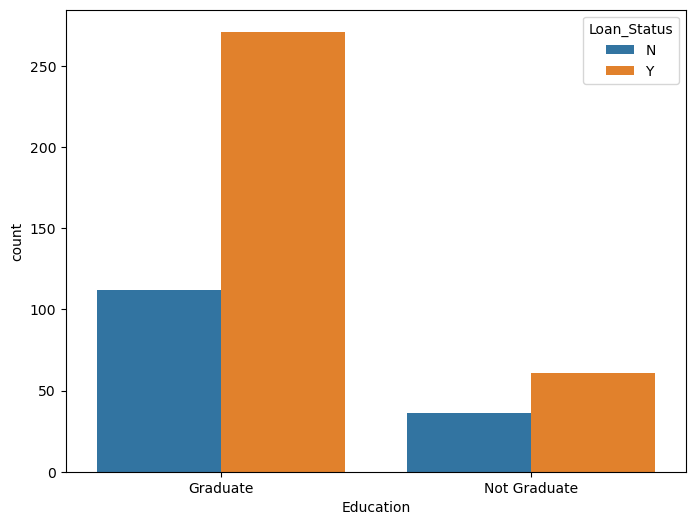

In [14]:
plt.subplots(figsize=(8, 6))
sns.countplot(x=train_df['Education'], hue=train_df['Loan_Status'])
plt.show()

### Task - Plat a histogram showing the distribution of income. Add also the number of loans applied and approved

In [15]:
train_df.corr()

C:\Users\arvenka\AppData\Local\Temp\ipykernel_17632\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


C:\Users\arvenka\AppData\Local\Temp\ipykernel_17632\3777349606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='Blues')


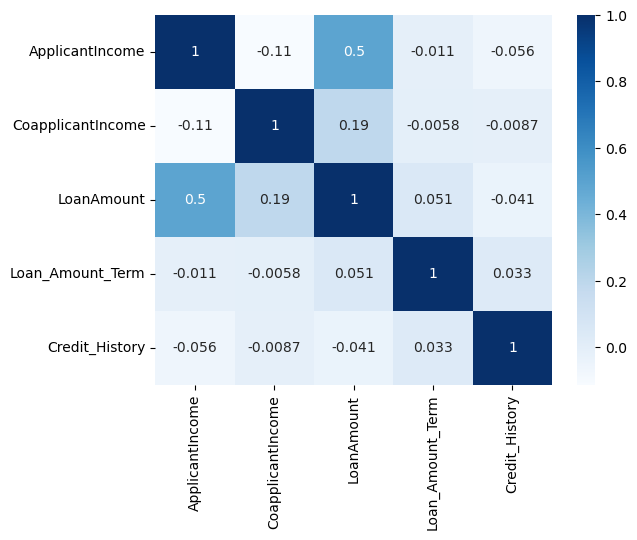

In [16]:
sns.heatmap(train_df.corr(), annot=True, cmap='Blues')
plt.show()

In [17]:
train_df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y


-- Key takeaway: Applicant incomes seems to be `moderately` correlated with the `loan amount`

In [18]:
from sklearn.model_selection import train_test_split # training and testing datasset split
from sklearn.preprocessing import StandardScaler #Standardization the data (x-mean)/std.deviation
from sklearn.tree import DecisionTreeClassifier

In [19]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
select_cols = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#### Encoding categorical features

In [21]:
train_df_encoded = pd.get_dummies(train_df[select_cols], drop_first=True)

In [22]:
train_df_encoded.sample(2).T

,41,422
ApplicantIncome,1800.0,1820.0
CoapplicantIncome,1213.0,1719.0
LoanAmount,47.0,100.0
Loan_Amount_Term,360.0,360.0
Credit_History,1.0,1.0
Gender_Male,1.0,1.0
Married_Yes,0.0,1.0
Dependents_1,0.0,0.0
Dependents_2,0.0,0.0
Dependents_3+,0.0,0.0


In [23]:
X = train_df_encoded

In [24]:
X.sample(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
92,3273,1820.0,81.0,360.0,1.0,1,1,0,1,0,1,0,0,1
339,4160,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,1,0


In [25]:
y = train_df['Loan_Status']

In [26]:
y.sample(2)

134    Y
431    N
Name: Loan_Status, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [28]:
X_train.shape

(384, 14)

In [29]:
X_test.shape

(96, 14)

## Build the model-1

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [31]:
tree_mod_1 = DecisionTreeClassifier()

In [32]:
tree_mod_1

DecisionTreeClassifier()

In [33]:
tree_mod_1.fit(X_train, y_train)

DecisionTreeClassifier()

**It seems that DT does need OHE/Label Encoding**

### Predit the test data set

In [34]:
pred_values = tree_mod_1.predict(X_test)

In [35]:
pred_values

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

### Calculate the performance metrics

In [36]:
print('Validation accuracy', accuracy_score(y_test, pred_values) * 100)

Validation accuracy 75.0


### Plot Consusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test, pred_values)

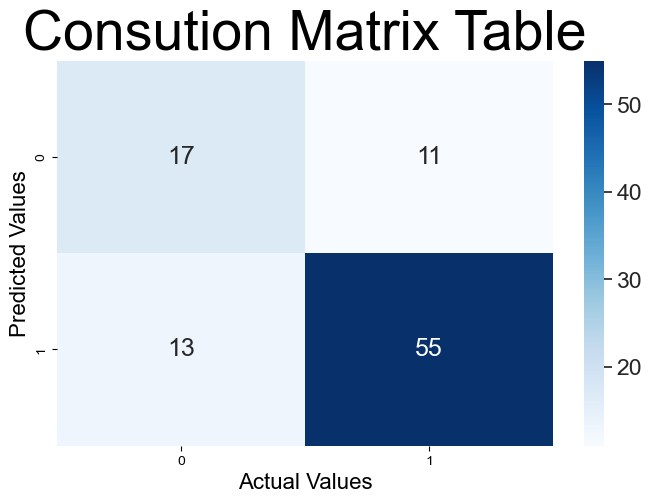

In [39]:
plt.subplots(figsize = (8, 5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Consution Matrix Table", fontsize=40)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.show()

In [40]:
y_test.shape

(96,)

In [41]:
1-(25/96)

0.7395833333333333

In [42]:
from sklearn.model_selection import cross_val_score

### Let us create the seperte model for K-fold(Segments ideally 5) CV(Cross Validation)

In [43]:
tree_mod_2 = DecisionTreeClassifier()

In [44]:
tree_mod_2

DecisionTreeClassifier()

In [51]:
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='accuracy')

In [52]:
cv_score

array([0.70833333, 0.70833333, 0.75      , 0.6875    , 0.67708333])

In [53]:
print('Validation Accuracy', cv_score.mean() * 100)

Validation Accuracy 70.625


### F1 Score

In [54]:
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='f1')

### Replace Y-> 1 and N-> 0

In [49]:
y.replace({'N': 0, 'Y':1}, inplace=True)

In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [55]:
cv_score

array([0.79104478, 0.8057554 , 0.8358209 , 0.74380165, 0.75      ])

In [56]:
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='recall')

In [57]:
cv_score

array([0.8030303 , 0.81818182, 0.83333333, 0.71641791, 0.71641791])

In [58]:
cv_score = cross_val_score(tree_mod_2, X, y, cv=5, scoring='precision')

In [59]:
cv_score

array([0.79104478, 0.73972603, 0.78571429, 0.81034483, 0.79661017])

## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
### Initialize the DT classifier
tree_mod_hpt = DecisionTreeClassifier()

In [62]:
tree_mod_hpt

DecisionTreeClassifier()

### Define the hyperparameters


In [63]:
hpt_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

In [64]:
grid_search = GridSearchCV(estimator=tree_mod_hpt, param_grid=hpt_grid, cv=5, scoring='accuracy')
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Get the best parameter hyperparameters


In [66]:
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:
### Get the best mean CV score
best_score = grid_search.best_score_
print("Best score: ", best_score)

Best score:  0.7958333333333334


## Creat a customer model using the best hyperparameters

In [70]:
### Initialize the DT classifier
tree_mod_hpt_best = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

In [71]:
tree_mod_hpt_best

DecisionTreeClassifier(max_depth=3)

In [73]:
tree_mod_hpt_best.fit(X_train, y_train)
pred_values = tree_mod_1.predict(X_test)
pred_values

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [74]:
print('Validation accuracy', accuracy_score(y_test, pred_values) * 100)

Validation accuracy 75.0
